# Purpose

I just want to explore the transfer function. I think if this is looked at as a clustering method then it makes sense to have activation for "most points" in the cluster

What does this mean though? The mahalanobis distance sort of tells you how far from the center of a cluster you are. I want to know if samplewise we can adjust a parameter to follow a distance such that X% of activated points are inside it.

I'm going to start by assuming that my estimated parameters of the distribution are correct so I don't have to worry about parameter mismatch. I can just draw from the distribution, calculate mahalanobis distance and adjust cut off until X% is inside.

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

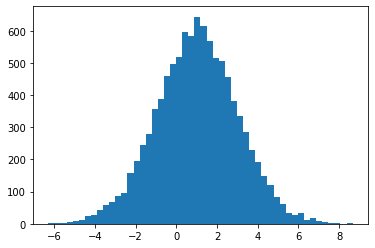

In [2]:
D = npr.randn(10000,1)
mu = 1
sig = 2

X = sig*D + mu

plt.hist(X, bins=50)
plt.show()

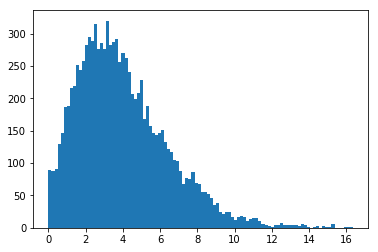

### Find a distance such that X% are less than it.

5.349978421844829


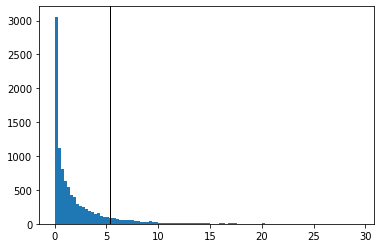

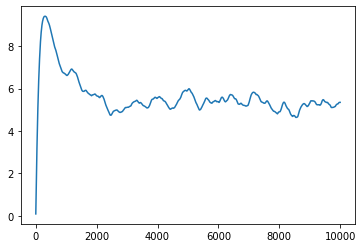

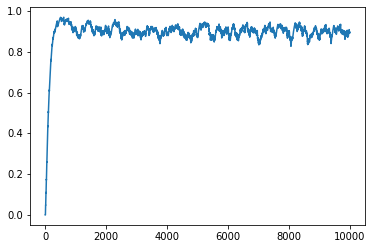

In [8]:
def find_dist(MD, p, lr=0.1):
    count = 0
    base = 100
    ED = 0
    
    edt = []
    ct = []
    
    for d in MD:
        if (base < 100):
            base += 1
        else:
            count -= count/base
            
        if (d < ED):
            count += 1
            
#         print ('{:.2f} : {} : {:.2f} : {:.2f}'.format(count, base, count/base, ED))
        ED += lr*(p-count/base)
#         if (count/base < p):
#             ED += lr*(p*count/base)
#         else:
#             ED -= lr
            
        edt.append(ED)
        ct.append(count/base)
    
    return ED, edt, ct

def mhd(x, mu, sig):
    return (x-mu)**2/sig

MD = mhd(X, mu, sig)
ED, edt, ct = find_dist(MD, 0.9)
print (ED)

plt.hist(MD, bins=100)
plt.axvline(ED, ymax=plt.ylim()[1], color='k', linewidth=1)
plt.show()

plt.plot(edt)
plt.show()

plt.plot(ct)
plt.show()



    
    

1.199999999999966


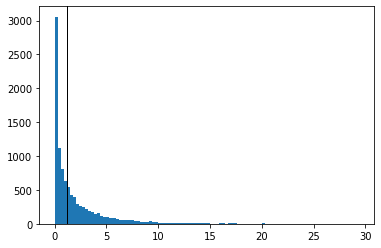

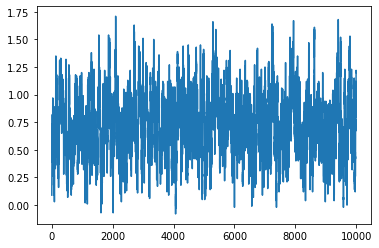

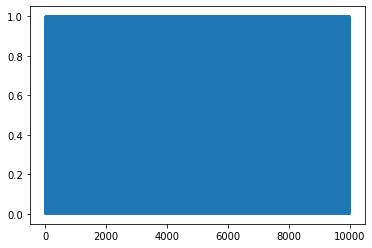

In [5]:
def find_dist(MD, p, lr=0.1):
    count = 0
    base = 0
    ED = 0
    sr = 2
    
    edt = []
    ct = []
    
    for d in MD:

#         count -= count*sr
# #         count = 0  if count < 0 else count
            
#         if (d < ED):
#             count += 1
            
        count = 1 if (d < ED) else 0
            
#         print ('{:.2f} : {} : {:.2f} : {:.2f}'.format(count, base, count/base, ED))
        ED += lr*(p-count*sr)
#         if (count/base < p):
#             ED += lr*(p*count/base)
#         else:
#             ED -= lr
            
        edt.append(ED)
        ct.append(count)
    
    return ED, edt, ct

def mhd(x, mu, sig):
    return (x-mu)**2/sig

MD = mhd(X, mu, sig)
ED, edt, ct = find_dist(MD, 0.9)
print (ED)

plt.hist(MD, bins=100)
plt.axvline(ED, ymax=plt.ylim()[1], color='k', linewidth=1)
plt.show()

plt.plot(edt)
plt.show()

plt.plot(ct)
plt.show()



    
    

13.496303478663007


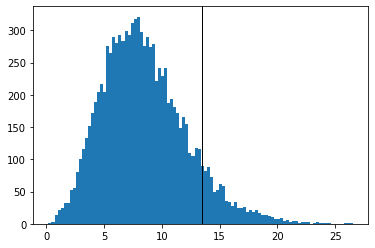

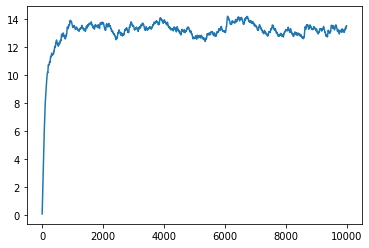

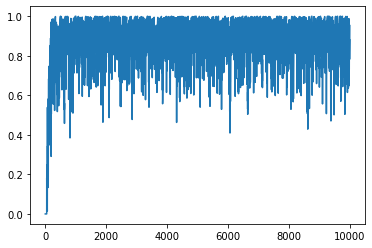

In [10]:
def find_dist(MD, p, lr=0.1, N=10):
    EMA = 0
    ED = 0
    alpha = 2/(N+1)
    
    edt = []
    ct = []
    
    for d in MD:
          
        EMA = EMA * (1-alpha)
        if (d < ED):
            EMA += alpha
            
        ED += lr*(p-EMA)
          
        edt.append(ED)
        ct.append(EMA)
    
    return ED, edt, ct

def mhd(x, mu, sig):
    return (x-mu)**2/sig

MD = mhd(X, mu, sig)
MD = mhd(X,10,10)
ED, edt, ct = find_dist(MD, 0.9, N=10)
print (ED)

plt.hist(MD, bins=100)
plt.axvline(ED, ymax=plt.ylim()[1], color='k', linewidth=1)
plt.show()

plt.plot(edt)
plt.show()

plt.plot(ct)
plt.show()



    
    